# Recibe la señal de audio

ValueError: x and y must have same first dimension, but have shapes (229376,) and (222445,)

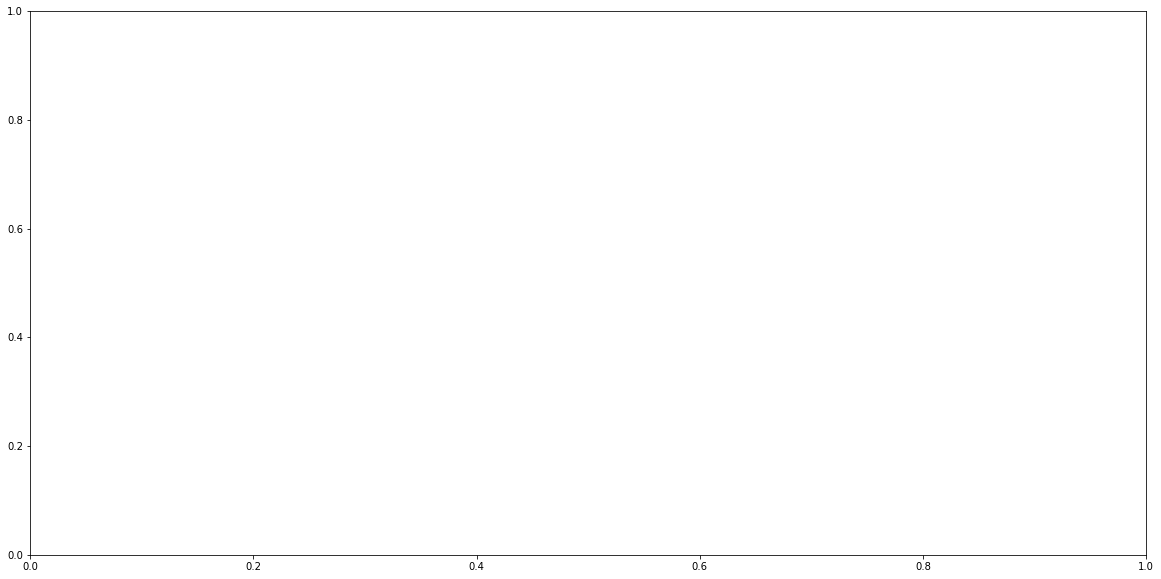

In [9]:
# Hay 2 formas de recibir la señal, por input o bien abriendo un archivo de sonido

#Desde un sonido, analizar fft 
import scipy.io.wavfile as waves
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fourier

filename='audioText.wav'

Fs,data=waves.read(filename)
Audio_m=data[:,0]
L=len(Audio_m)
Ts=0.08 #Tiempo de muestreo
n=Ts*np.arange(0,L)

#Quitar los primeros elementos que poseen ceros del arreglo
aux=Audio_m
while aux[0]<2:
    aux=aux[1:]


#Obtener el FFT de la primera ventana tomando los primeros 44100*0.08 elementos






#fig,ax=plt.subplots()
plt.figure(figsize=(20,10))
plt.plot(n,aux)
plt.xlabel('Tiempo(s)')
plt.ylabel('Audio')
plt.show()


gk=fourier.fft(aux)
M_gk=abs(gk)
M_gk=M_gk[0:L//2]

F=(Fs/L)*np.arange(0,L//2)
#fig,bx=plt.subplots()
plt.figure(figsize=(20,10))
plt.plot(F,M_gk)
plt.xlabel('Frecuencia(Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()
